In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
import sys
sys.path.insert(0, "../")
import trimesh
import numpy as np
from nara.processing.surface import TextureProjector3d

frame = 1
person = "377"
uv_fpath = "../data/uv_table.npy"
mesh_fpath = f"/home/group-cvg/datasets/easymocap/meshes/{person}/%06d.obj" % frame

mesh = trimesh.load(mesh_fpath)

V = mesh.vertices
F = mesh.faces
T = np.load(uv_fpath)

# 13776
# 13776
print("F", F.shape, V.shape, np.min(F), np.max(F))

samples = np.array([
    [1, 0], [0.5, 0.5], [0.6, 0.4]
], dtype=np.float32)

proj = TextureProjector3d(T)

# proj.query(samples)

F (13776, 3) (6887, 3) 0 6886


<IPython.core.display.Javascript object>


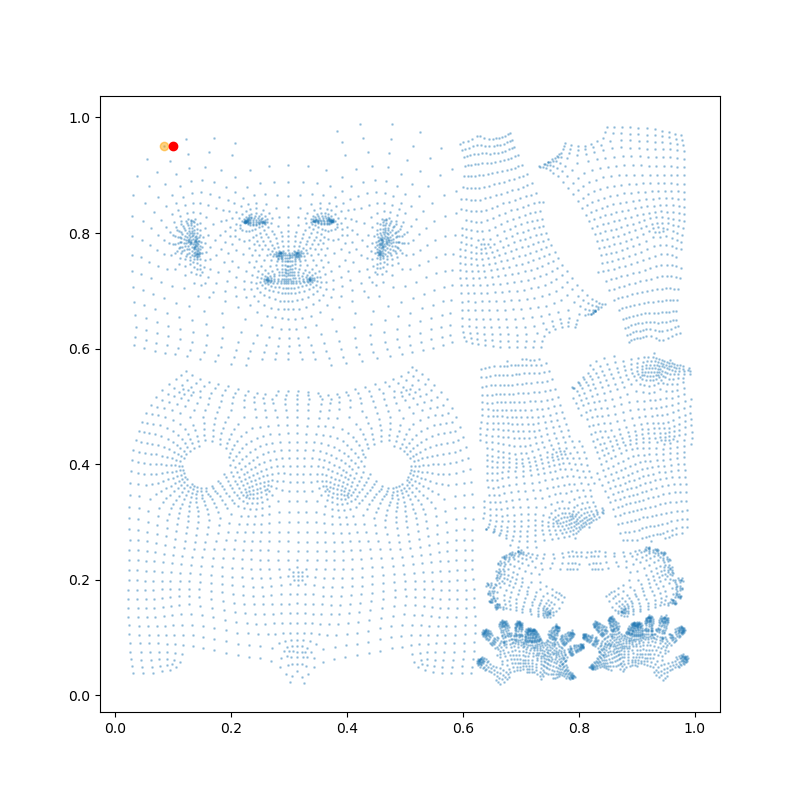

# 1


In [2]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

pt = np.array([0.1, 0.95])

indices = proj.lookup.query_ball_point(pt, r=0.020)

print("#", len(indices))



ax.scatter(T[:, 0], T[:, 1], alpha=0.3, s=1)

for i in indices:
    ax.scatter(T[i, 0], T[i, 1], color='orange', alpha=0.5)

ax.scatter(pt[0], pt[1], color='red')
    
    
plt.show()

<IPython.core.display.Javascript object>


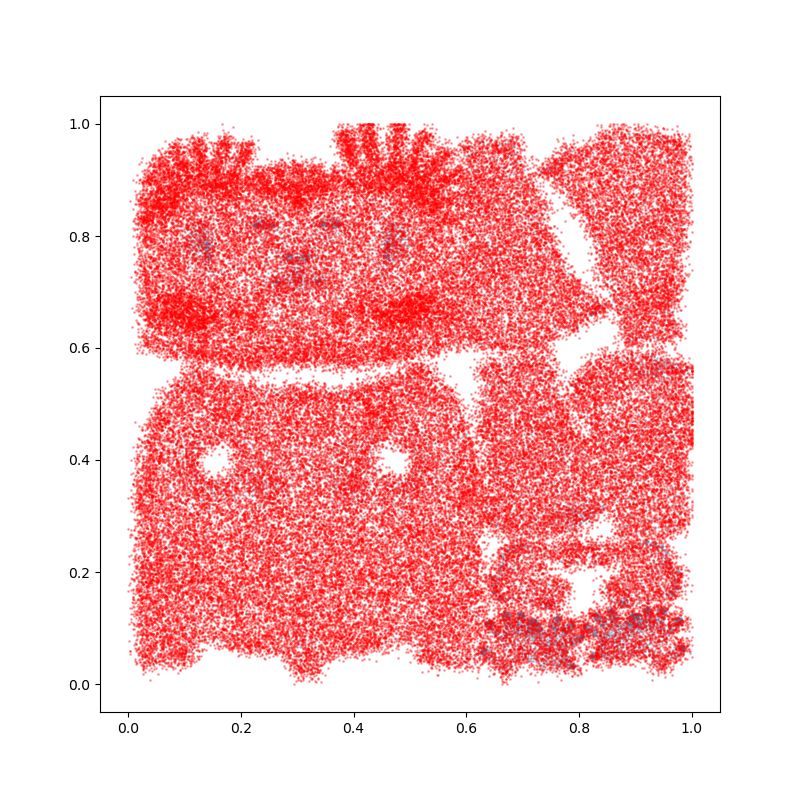

In [5]:
pts = proj.random_sample(100000, F=F, max_dist=0.0001)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.scatter(T[:, 0], T[:, 1], alpha=0.3, s=1)

ax.scatter(pts[:, 0], pts[:, 1], alpha=0.3, s=1, color='red')



plt.show()